Eda İpek Sanlı Bilgisayar Mühendisliği 20040101006 Dataset link=https://www.kaggle.com/datasets/ananthr1/weather-prediction/code?datasetId=1868601&sortBy=voteCount

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read and check data
df = pd.read_csv("seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [4]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [5]:
#Concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
df.shape

(1461, 6)

In [33]:
df.date.value_counts()

date
2012-01-01    1
2014-09-09    1
2014-09-07    1
2014-09-06    1
2014-09-05    1
             ..
2013-04-30    1
2013-04-29    1
2013-04-28    1
2013-04-27    1
2015-12-31    1
Name: count, Length: 1461, dtype: int64

In [35]:
df['date'] = pd.to_datetime(df['date'])

(array([15340., 15522., 15706., 15887., 16071., 16252., 16436., 16617.,
        16801.]),
 [Text(15340.0, 0, '2012-01'),
  Text(15522.0, 0, '2012-07'),
  Text(15706.0, 0, '2013-01'),
  Text(15887.0, 0, '2013-07'),
  Text(16071.0, 0, '2014-01'),
  Text(16252.0, 0, '2014-07'),
  Text(16436.0, 0, '2015-01'),
  Text(16617.0, 0, '2015-07'),
  Text(16801.0, 0, '2016-01')])

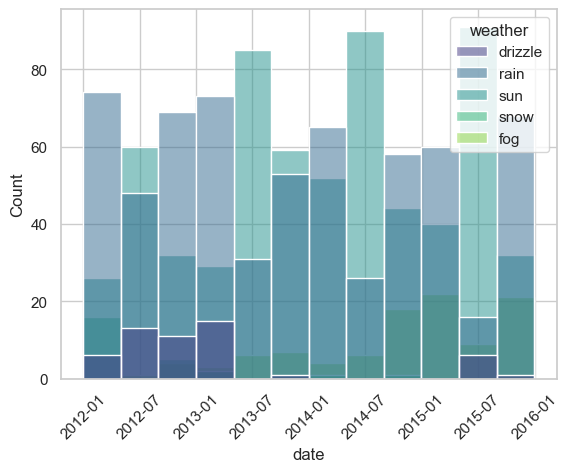

In [48]:
sns.histplot(df, x='date', hue='weather', palette='viridis')
plt.xticks(rotation=45)

<Axes: xlabel='wind', ylabel='Count'>

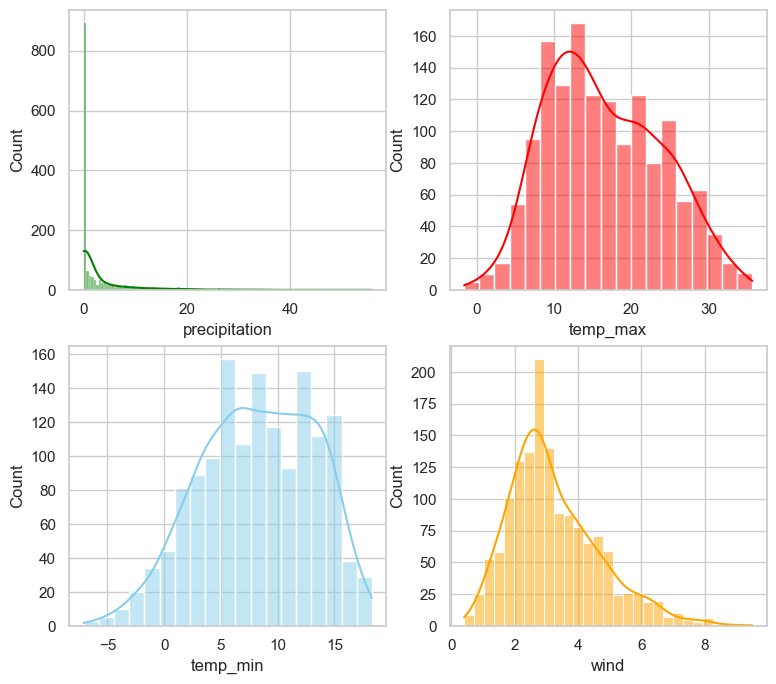

In [11]:
fig,axs=plt.subplots(2,2,figsize=(9,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')

c:\Users\nosce\anaconda3\envs\py9\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


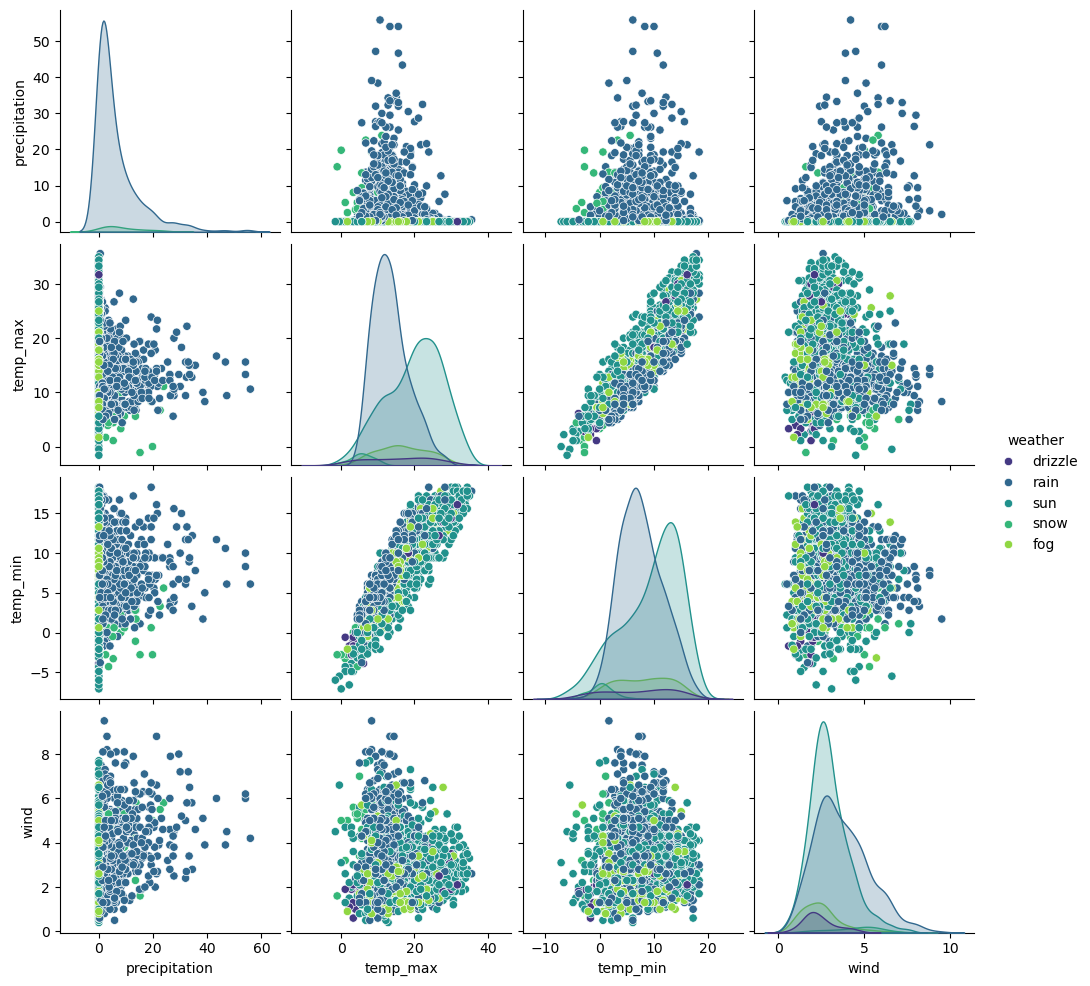

In [7]:
sns.pairplot(df, hue='weather', palette="viridis")

<Axes: >

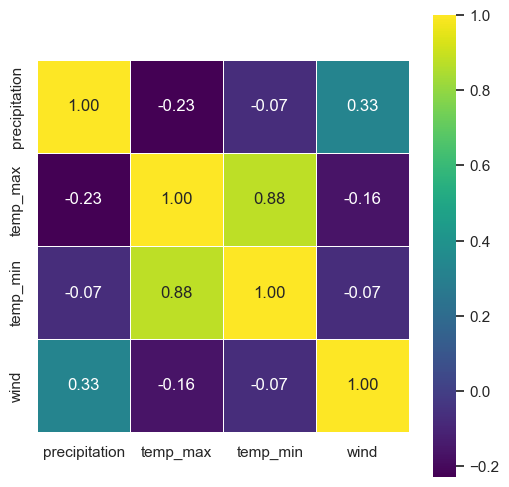

In [8]:

plt.figure(figsize=(6,6))
sns.set(font_scale=1)
sns.set_style("whitegrid")

sns.heatmap(df.drop(columns=['weather','date']).corr(), annot=True, fmt=".2f", cmap="viridis", square=True, linewidths=.5)


(array([15340., 15522., 15706., 15887., 16071., 16252., 16436., 16617.,
        16801.]),
 [Text(15340.0, 0, '2012-01'),
  Text(15522.0, 0, '2012-07'),
  Text(15706.0, 0, '2013-01'),
  Text(15887.0, 0, '2013-07'),
  Text(16071.0, 0, '2014-01'),
  Text(16252.0, 0, '2014-07'),
  Text(16436.0, 0, '2015-01'),
  Text(16617.0, 0, '2015-07'),
  Text(16801.0, 0, '2016-01')])

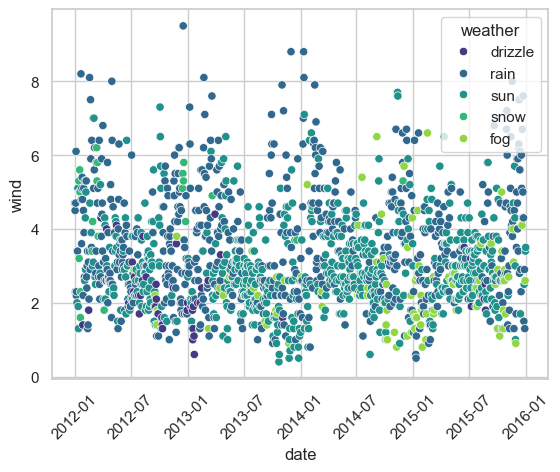

In [47]:
sns.scatterplot(data=df, x='date', y='wind', hue='weather', palette="viridis")
plt.xticks(rotation=45)

c:\Users\nosce\anaconda3\envs\py9\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

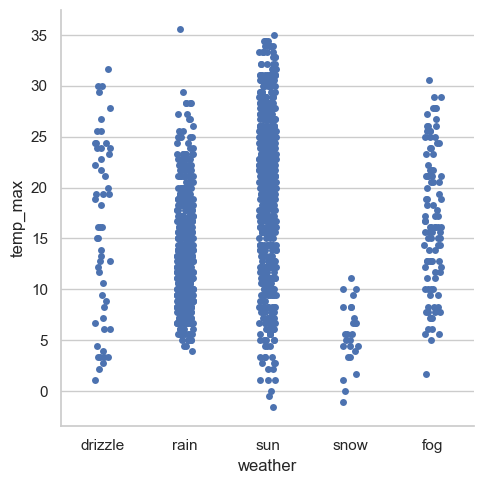

In [10]:
plt.figure(figsize=(10,5))
sns.catplot(df, x="weather", y="temp_max")

<Axes: xlabel='weather', ylabel='wind'>

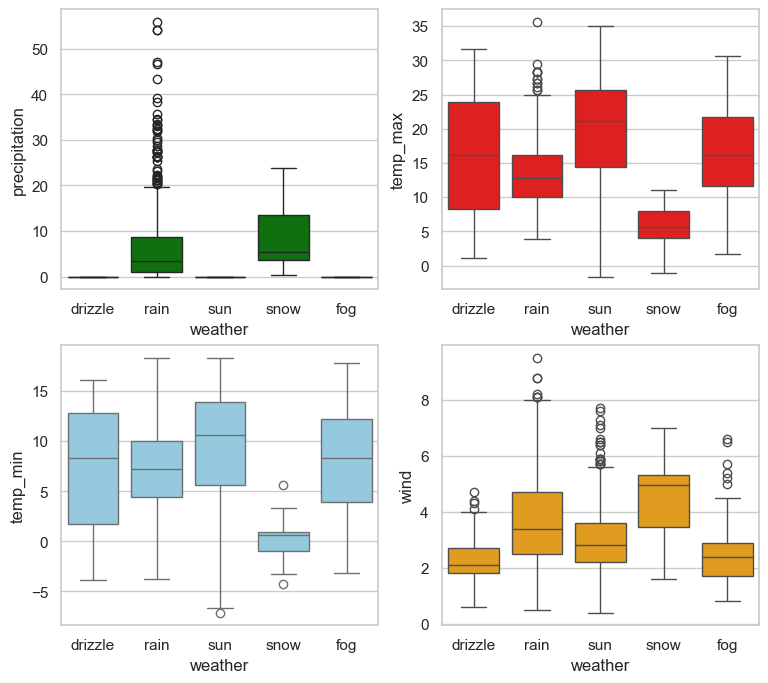

In [12]:
fig,axs=plt.subplots(2,2,figsize=(9,8))
sns.boxplot(x='weather', y='precipitation', data=df, ax=axs[0,0], color='green' )
sns.boxplot(x='weather', y='temp_max', data=df, ax=axs[0,1], color='red')
sns.boxplot(x='weather', y='temp_min', data=df, ax=axs[1,0], color='skyblue')
sns.boxplot(x='weather', y='wind', data=df, ax=axs[1,1], color='orange')

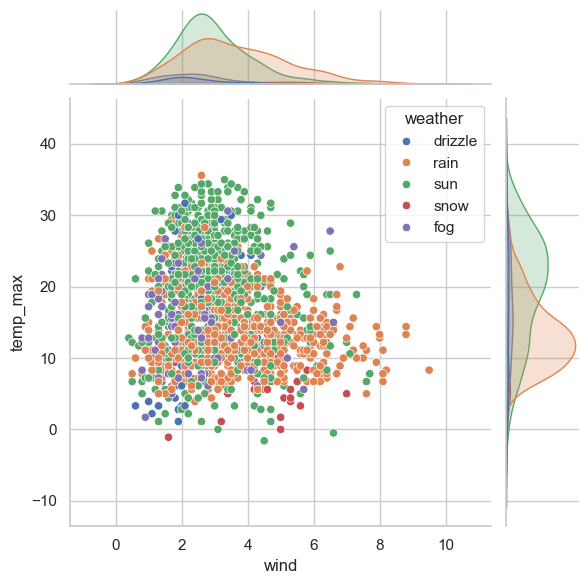

In [53]:
sns.jointplot(data=df, x='wind', y='temp_max', hue='weather')